<a href="https://colab.research.google.com/github/gabrieldimas/machine-learning-study-2023/blob/main/tmnist_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Dataset From Here
https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters?resource=download

In [1]:
#importing the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Kuliah/MachineLearning/Tubes/archive/94_character_TMNIST.csv"
data = pd.read_csv(path)

In [4]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print("The Shape of the Dataset: ", data.shape)
print("Number of Samples: ", data.shape[0])
print("Number of Features: ", data.shape[1])

The Shape of the Dataset:  (274093, 786)
Number of Samples:  274093
Number of Features:  786


In [6]:
print("Number of unique character present in the Dataset: ", len(data.labels.unique()))

Number of unique character present in the Dataset:  94


In [7]:
all_unique_chars = list(data.labels.unique())
print(all_unique_chars)

['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']


In [8]:
X = data.drop(columns=['names','labels']).values
y = data[['labels']].values

In [9]:
X = X.astype('u1')
X.dtype

dtype('uint8')

In [10]:
X.shape, y.shape

((274093, 784), (274093, 1))

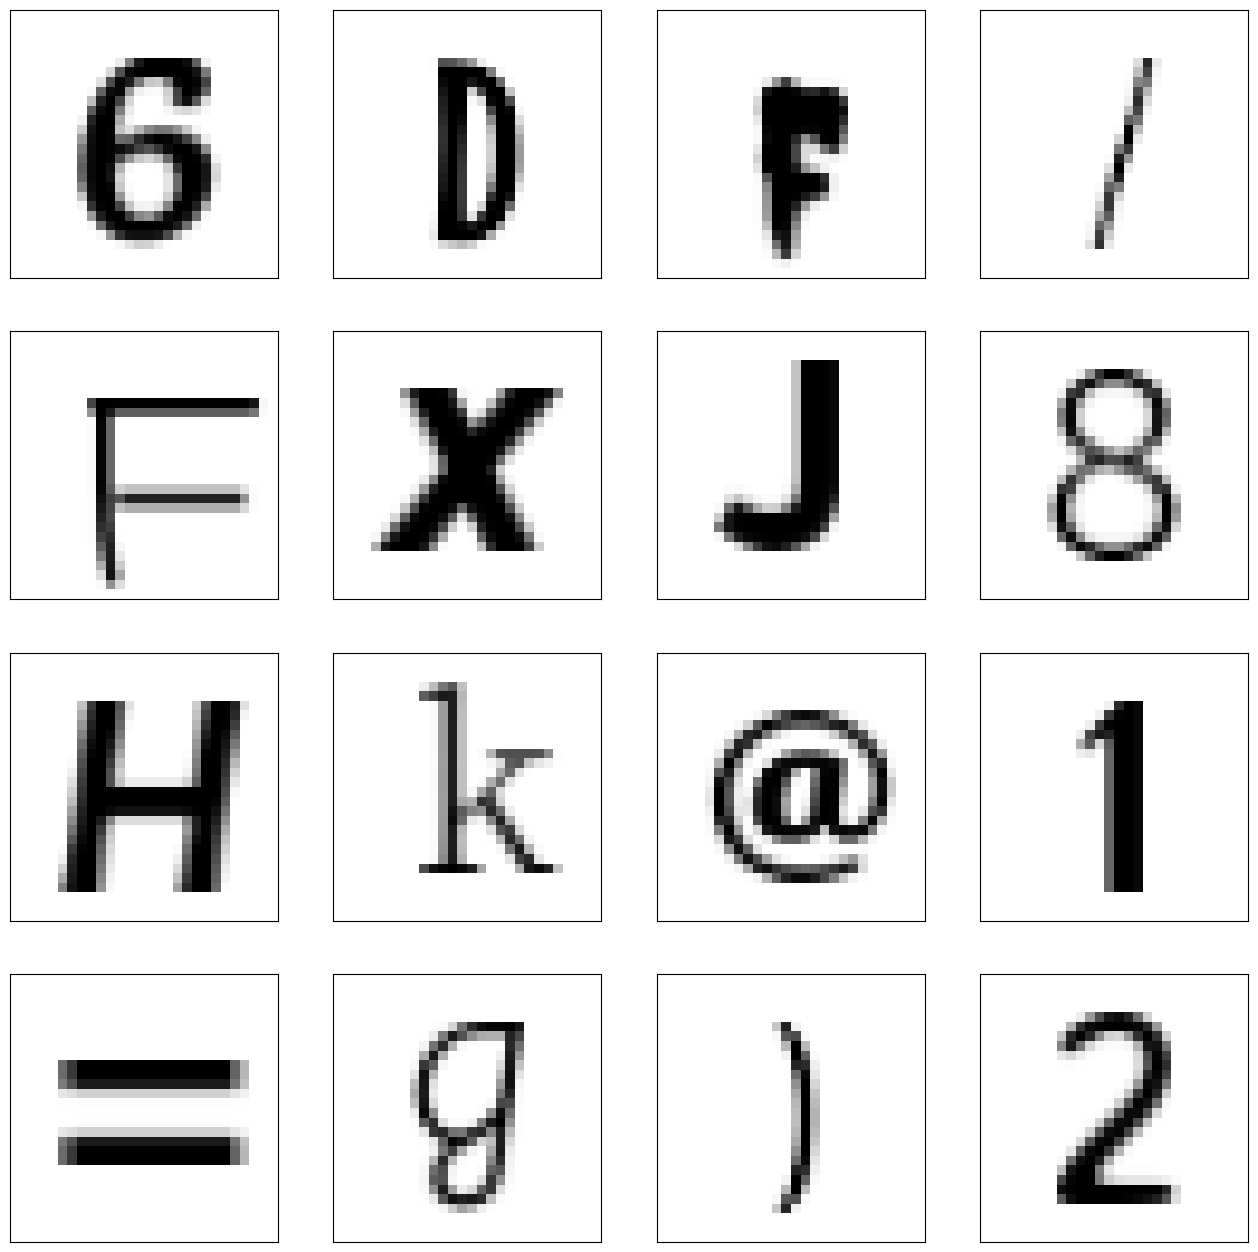

In [11]:
X_images = X.reshape(-1,28,28)
fig,axs = plt.subplots(4,4,figsize=(16,16))
for i in range(16):
    r=i//4
    c=i%4
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i], cmap="Greys")
plt.show()
del X_images

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [13]:
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [14]:
lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(246683,)
Test labels dimension:
(27410,)


In [15]:
X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

In [16]:
X_train.shape

(246683, 28, 28, 1)

Model CNN

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(4,4),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(y_train_label.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [19]:
model_result = model.fit(X_train, y_train_label, validation_split=0.2, epochs=30, batch_size=64, verbose=1)

Epoch 1/30
3084/3084 [==============================] - 25s 6ms/step - loss: 0.6695 - accuracy: 0.8059 - val_loss: 0.3497 - val_accuracy: 0.8845
Epoch 2/30
3084/3084 [==============================] - 18s 6ms/step - loss: 0.3464 - accuracy: 0.8909 - val_loss: 0.2683 - val_accuracy: 0.9160
Epoch 3/30
3084/3084 [==============================] - 18s 6ms/step - loss: 0.2837 - accuracy: 0.9104 - val_loss: 0.2456 - val_accuracy: 0.9237
Epoch 4/30
3084/3084 [==============================] - 17s 6ms/step - loss: 0.2506 - accuracy: 0.9201 - val_loss: 0.2194 - val_accuracy: 0.9313
Epoch 5/30
3084/3084 [==============================] - 17s 6ms/step - loss: 0.2287 - accuracy: 0.9255 - val_loss: 0.2266 - val_accuracy: 0.9296
Epoch 6/30
3084/3084 [==============================] - 18s 6ms/step - loss: 0.2143 - accuracy: 0.9298 - val_loss: 0.2161 - val_accuracy: 0.9302
Epoch 7/30
3084/3084 [==============================] - 18s 6ms/step - loss: 0.2022 - accuracy: 0.9322 - val_loss: 0.2075 - val_ac

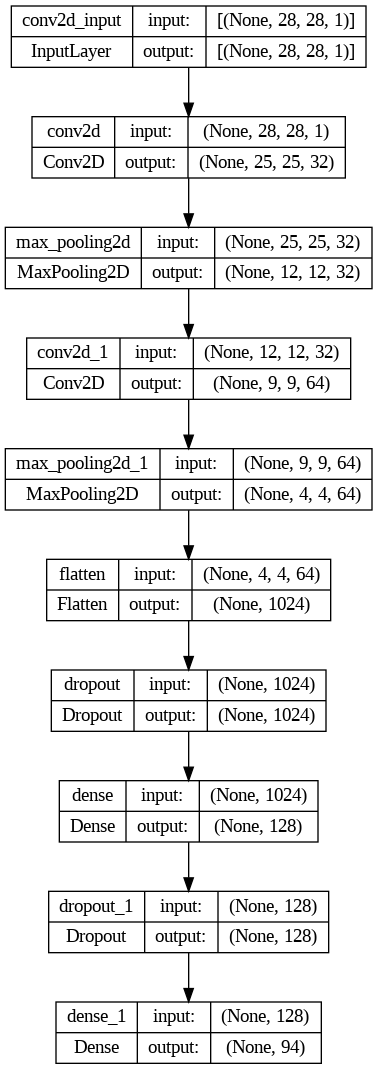

In [20]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

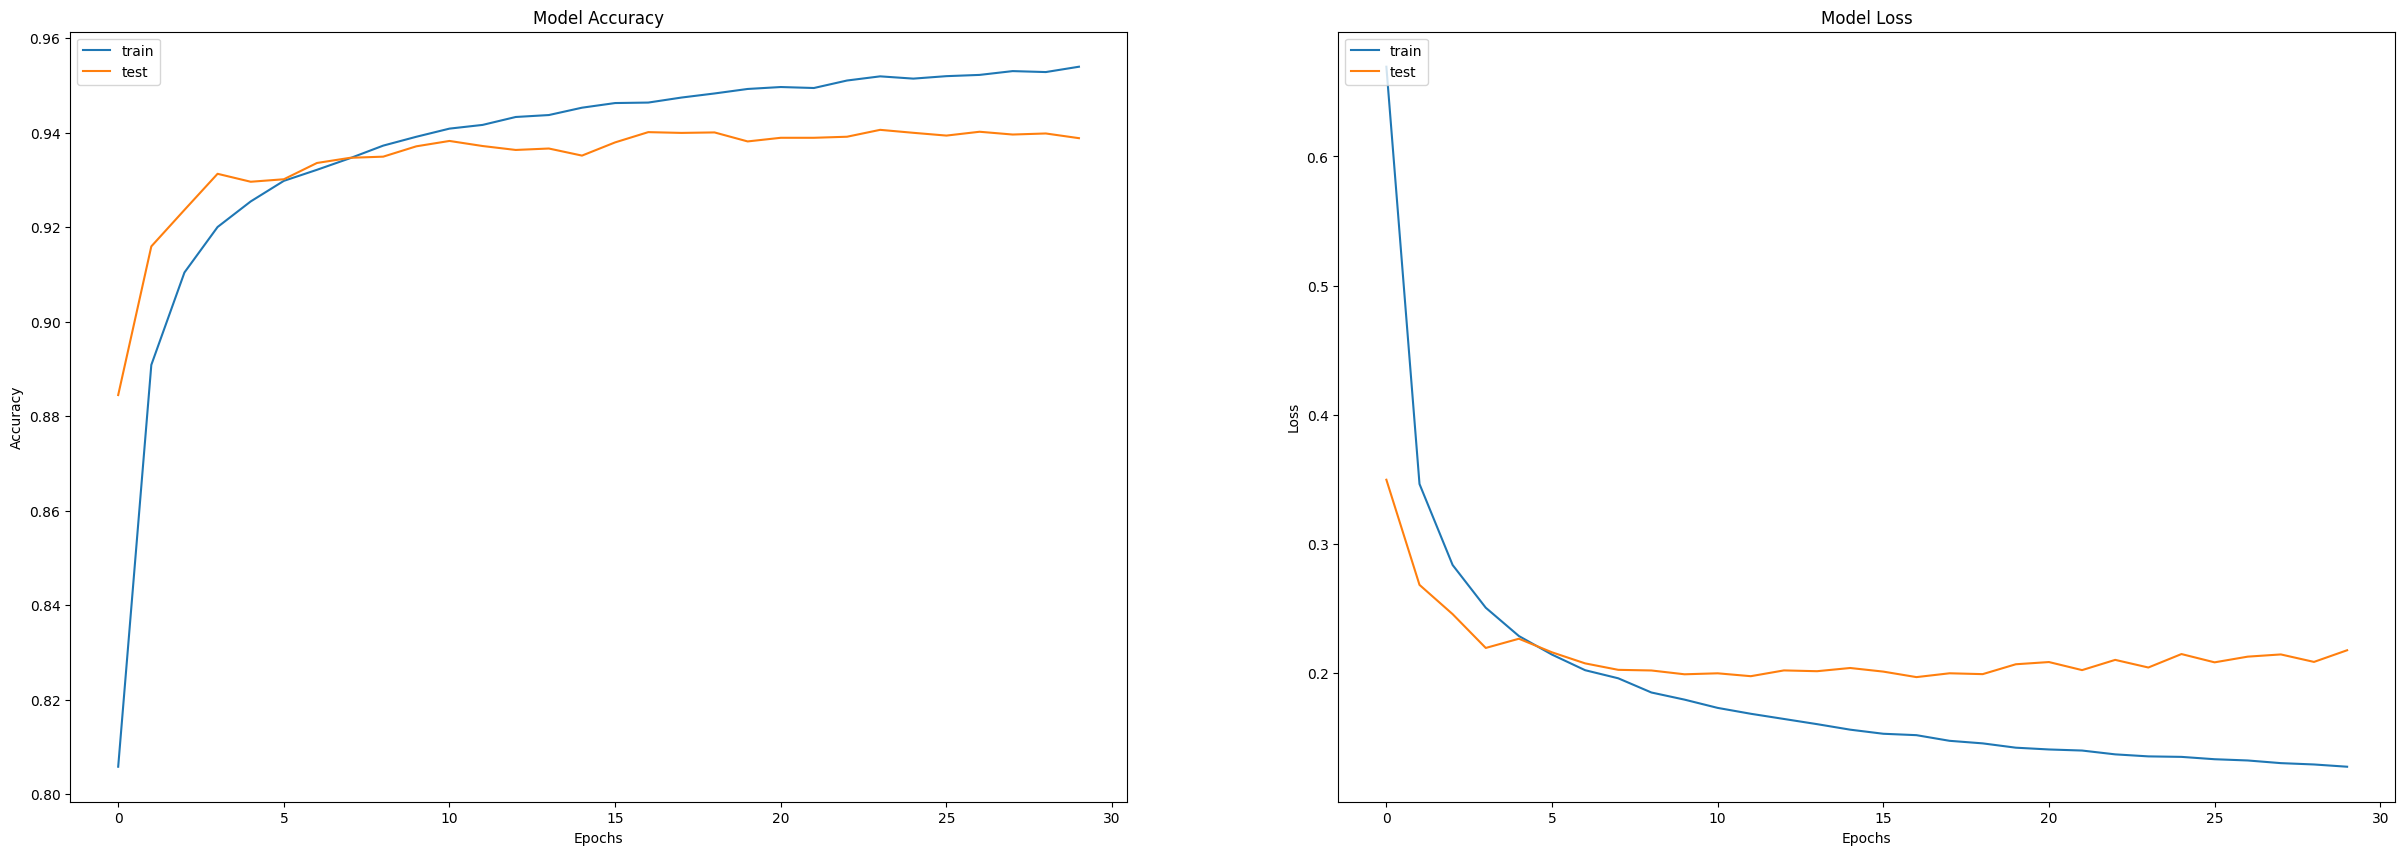

In [21]:
fig, ax = plt.subplots(1,2 , figsize = (30,10))
# summarize history for accuracy
ax[0].plot(model_result.history['accuracy'])
ax[0].plot(model_result.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax[1].plot(model_result.history['loss'], label =['loss'])
ax[1].plot(model_result.history['val_loss'] ,label =['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:
model.save('model_ocr.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
loaded_model = tf.keras.models.load_model('model_ocr.h5')